### Homework 1

Dataset escolhido: (Adult Data Set) https://archive.ics.uci.edu/ml/datasets/Adult

O objetivo deste dataset é determinar o nível de rendimento anual de pessoas com base em atributos como idade, nivel de educação, estado civil, etc.


Trabalho realizado por: António Ramos Nº 101193, Emanuel Ferreira Nº 104560 , Rafael Sá Nº 104552

In [1]:
%matplotlib inline
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import preprocessing
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import seaborn as sb
import pingouin as pg
import io
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from IPython.display import Image
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


#### Ler informação do ficheiro

In [2]:
df = pd.read_csv("adult.csv")
df

,Age,Work Class,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital gain,Capital loss,Hours per week,Native Country,Prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Data types

* Age - Numeric Ratio-scaled
* Work class - Categorical Nominal
* fnlwgt - Numeric Ratio-scaled
* Education - Categorical Ordinal
* Education number - Numeric Interval-scaled
* Marital Status - Categorical Nominal
* Occupation - Categorical Nominal
* Relationship - Categorical Nominal
* Race - Categorical Nominal
* Gender - Categorical Nominal
* Capital gain - Numeric Interval-scaled
* Capital loss - Numeric Interval-scaled
* Native Country - Categorical Nominal


#### Verificar se existem valores em falta

In [3]:
df.isnull().sum()

Age                 0
Work Class          0
fnlwgt              0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital gain        0
Capital loss        0
Hours per week      0
Native Country      0
Prediction          0
dtype: int64

###### Algumas entradas tem valores em falta com '?'.
Simplesmente removemos porque não representam uma quantidade significativa do nosso dataset


In [4]:
df.loc[27]

Age                                  54
Work Class                            ?
fnlwgt                           180211
Education                  Some-college
Education Number                     10
Marital Status       Married-civ-spouse
Occupation                            ?
Relationship                    Husband
Race                 Asian-Pac-Islander
Gender                             Male
Capital gain                          0
Capital loss                          0
Hours per week                       60
Native Country                    South
Prediction                         >50K
Name: 27, dtype: object

In [5]:
df = df[(df != ' ?').all(axis=1)]
df

,Age,Work Class,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital gain,Capital loss,Hours per week,Native Country,Prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##### 'Education' e 'Education Number' são a mesma caracteristica em forma numerica e categorica e portanto podemos remover uma delas

In [6]:
education_mapping = {
 ' Preschool': 1,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' HS-grad': 9,
 ' Some-college': 10,
 ' Assoc-voc': 11,
 ' Assoc-acdm': 12,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Prof-school': 15,
 ' Doctorate': 16,
}

df['Education'] = df['Education'].map(education_mapping)
df

C:\Users\tonya\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Work Class,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital gain,Capital loss,Hours per week,Native Country,Prediction
0,39,State-gov,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df = df.drop(columns=['Education'])
dfNum = df._get_numeric_data()
df

,Age,Work Class,fnlwgt,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital gain,Capital loss,Hours per week,Native Country,Prediction
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.describe()

,Age,fnlwgt,Education Number,Capital gain,Capital loss,Hours per week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###  Observações

1. O dataset tem inicialmente cerca de 32000 entradas, sendo que depois do tratamento de entradas com valores em falta ficamos com um dataset de aproximadamente 30000 entradas.

2. Este dataset foi construido com base num Census. O atributo fnlwgt (final weight) é um peso que indica o número de pessoas que o Census pensa que a entrada representa.

3. 'Educação' e 'Grau de Educação' correspondem à mesma característica, apenas estão representadas de forma diferente, e portanto não é relevante mantermos ambas no dataset.




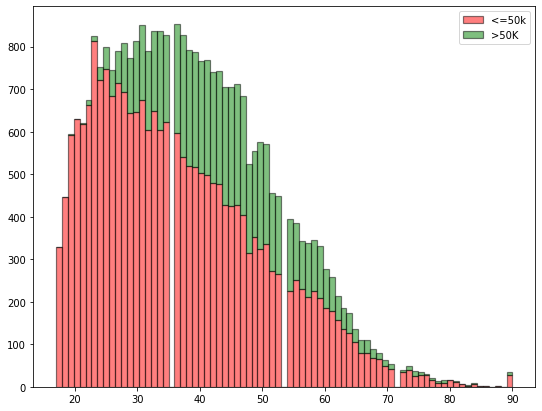

In [9]:
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(9,7))

dfA=df[df['Prediction'] == ' <=50K']
dfB=df[df['Prediction'] == ' >50K']

plt.hist([dfA['Age'],dfB['Age']],bins=77, alpha=0.5,stacked=True, label=['<=50k','>50K'],color=['r','g'], edgecolor='black', linewidth=1.2)
plt.legend(loc='upper right')

plt.show()

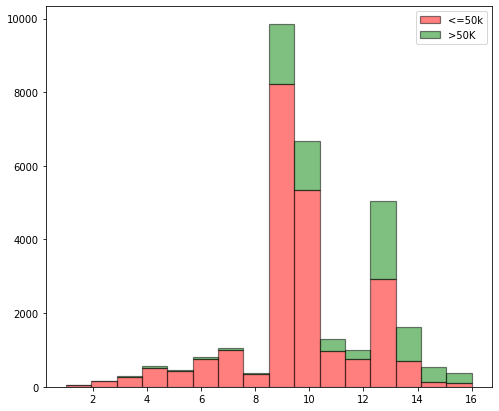

In [10]:
fig = plt.figure(figsize=(8,7))
plt.hist([dfA['Education Number'],dfB['Education Number']],bins=16, alpha=0.5,stacked=True, label=['<=50k','>50K'],color=['r','g'], edgecolor='black', linewidth=1.2)
plt.legend(loc='upper right')

plt.show()

### BOXPLOT

In [ ]:
boxplot = df.boxplot(column=['Age'], figsize=(5,11))
plt.show()

### Análise gráfico

* Neste gráfico podemos verificar que no estudo houve mais pessoas com idade compreendidas entre 28 e 48 anos e que a idade mais comum é 38 anos, sendo que o espetro de idades está compreendida entre 18 e 90. Achamos oportuno fazer um boxplot sobre a idade, pois através dele podemos ter a noção do ativo das idades que trabalham, ou seja, as pessoas entre 28 e os 48 costumam desenvolver na carreira e no dinheiro, por isso são idades comuns no estudo.

### Pearson correlation

In [ ]:
df.dropna(how='all')

data = pd.DataFrame({'Capital gain': df['Capital gain'], 'Capital loss': df['Capital loss']})
pg.pairwise_corr(data, columns=['Capital gaub', 'Capital gain'], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Capital gain,Capital loss,pearson,two-sided,30162,-0.032229,"[-0.04, -0.02]",0.001039,0.000972,-0.03224,2.161430e-08,4.615e+04,0.999863


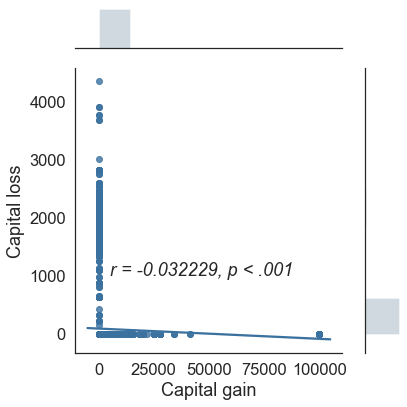

In [15]:
import seaborn as sns
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.5)

graph = sns.JointGrid(data=df, x='Capital gain', y='Capital loss')
graph = graph.plot_joint(sns.regplot, color="xkcd:muted blue")
graph = graph.plot_marginals(sns.distplot, kde=False, bins=7, color="xkcd:bluey grey")
graph.ax_joint.text(5000, 1000, 'r = -0.032229, p < .001', fontstyle='italic')
plt.tight_layout()

Através da realização de um gráfico sobre correlação entre os ganhos e perdas dos inquiridos, verificamos que há mais pessoas a perder dinheiro do que a ganhar, através dos ponto do tipo (x,0). Há relativamente poucos casos em que os indivíduos recebem mais do que perdem, como o ponto (0,100000), ou seja, há uma descrepância entre ganhos nos inquiridos.

### ANOVA tests

In [75]:
# Run the ANOVA
gain = pg.anova(data=df, dv='Capital gain', between='Hours per week', detailed=True)
loss = pg.anova(data=df, dv='Capital loss', between='Hours per week', detailed=True)
print(gain)
print('\n')
print(loss)

           Source            SS     DF            MS         F         p-unc  \
0  Hours per week  2.184367e+10     93  2.348782e+08  4.325792  1.004016e-39   
1          Within  1.632607e+12  30068  5.429716e+07       NaN           NaN   

        np2  
0  0.013203  
1       NaN  


           Source            SS     DF             MS         F         p-unc  \
0  Hours per week  3.751208e+07     93  403355.649444  2.478906  1.330069e-13   
1          Within  4.892520e+09  30068  162715.168973       NaN           NaN   

        np2  
0  0.007609  
1       NaN  


Para tentar desvendar o mito do quotidiano que a dependência de horas feitas no trabalho significa receber mais, comparamos as variáveis "Capital gain" com "Hours per week" vs "Capital loss" com "Hours per week" através do ANOVA.
Inferimos que o valor do "gain" é superior ao "loss", o que significa que as horas feitas por semana têm mais impacto nos ganhos do que as perdas.

### HEATMAP


In [59]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Age,fnlwgt,Education Number,Capital gain,Capital loss,Hours per week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
Education Number,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
Capital gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
Capital loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
Hours per week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


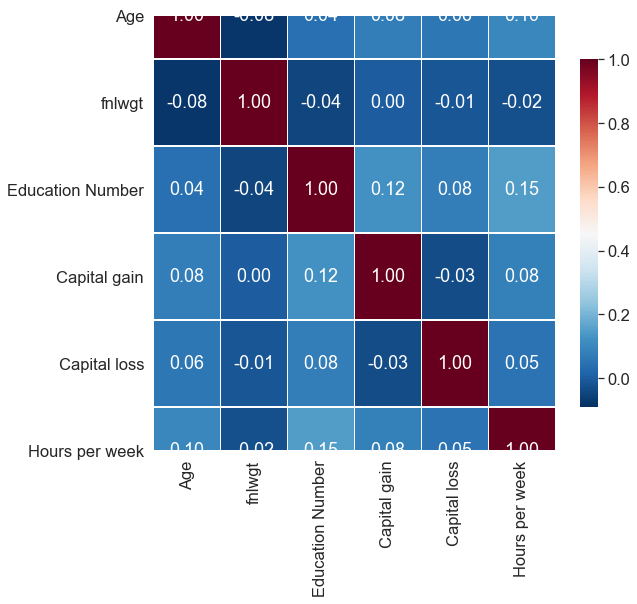

In [63]:
fig, ax = plt.subplots(figsize=(9,8))

sb.heatmap(pearsoncorr,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2, vmin= -0.09, vmax=1.00, cbar_kws={"shrink": .8}, fmt='.2f')

Em suma, a realização do heatmap dá-nos a entender a correlação das variáveis, permitindo assim a facilidade da escolha de variáveis nos próximos estudos com os dados.